# Module II: Medical Data & Machine Learning

# Lecture 14 - Neural Network II - CNN & RNN

# By Cheng Peng & Yong Yang

————————————————————————————————————————————————————————————————

# 写在前面

各位同学大家下午好，这次课我们继续**Python**的学习。

我们之前简单介绍了人工神经网络（**Artificial Neural Network，ANN**），包括神经网络的原理，以及一些相关的基本概念。

比如：人工神经元（节点）；激活函数；前向传递；后向传递等等。

这次课我们继续深入介绍两种神经网络的子类型，分别是卷积神经网络（**Convolutional Neural Network, CNN**）以及循环神经网络（**Recurrent neural network, RNN**）。

这两种子类型相比于前面讲到的完全通过全连接层组成的神经网络，具有很多独特优势，应用也更为广泛，因此有必要更为深入的讨论一下。

**P.S.** 神经网络这个部分的难度相比前面的基于简单数学模型的算法确实有比较大的提升。

在前面的课程里面数学模型比较明确，我们推导一下公式，然后得出一个结果，再把这个结果想明白（维数，怎么计算，和输入数据有什么关系之类的），最后用程序语言表述出来就可以了。

但是神经网络不一样，它的原理似乎不复杂，但是规模很大，多层嵌套，很容易把人绕进去。

这个是课程的难度曲线设计的有问题，我这边没有设计好，然后有很多需要用到的操作没有在前面的课程中讲解和练习，比如一些关键字**class**，**def**，然后还有函数的递归，嵌套调用等等。

此外，神经网络的可解释性也是一个热门研究领域，导致我们不能像以前的那些算法那样从中间把这个网络拆解开，然后分析这些数据的意义。

神经网络这部分我自己讲的也确实很不好，我会在后续课程中改进，但是恐怕就要等到下一轮上课了。

另外，关于神经网络，如果各位同学后面确实需要从事神经网络相关的工作的话，最好的方法还是自己寻找一个感兴趣的项目然后一步一步的自己实现。

实际操作是非常高效的学习手段，比光是看书要好得多。

我也希望我讲解的这部分内容能够对同学们下去钻研的时候提供一些帮助。

但是同时，也建议各位同学不要把全部希望都押在这门课上，毕竟以我现在的水平，确实不能只通过一节课的讲解就让同学们精通神经网络。

————————————————————————————————————————————————————————————————

# 正式内容

本次课的内容主要包括三个方面：

（1）**CNN & RNN** 的原理以及工作过程分析；

（2）**CNN & RNN** 的**Python**代码实现以及拆解；

（3）**CNN & RNN** 方法的应用练习；

————————————————————————————————————————————————————————————————

# 1-CNN & RNN的模型以及相关基本概念介绍

首先，什么是卷积神经网络（**Convolutional Neural Network, CNN**）以及循环神经网络（**Recurrent neural network, RNN**）。

为什么这两类神经网络的子类别要单独拎出来说。

在前面的讲解中，我们只介绍了最基本的全连接型神经网络（**Full Connected Neural Network**）。

它是模仿高等动物的中枢神经系统的连接结构实现的，由大量基本的神经元（人工神经元）组成，神经元彼此之间存在丰富的互相连接。

这种神经网络的特点是由一个或者多个全连接层（**Full Connected Neural Layers**）堆叠组成，每一层的每个节点都和上面一层的全部节点相连，互相之间有加权后的数据传递（矩阵乘法）。

然后通过对训练集数据不断的前向与后向传递，刷新层与层之间的权重系数 $ \mathbf{W} $ 最终达到我们希望神经网络完成的功能。

理论上，只要神经网络有足够多的层，每层中包含的神经元数量也足够多，那么这个神经网络就可以拟合任何函数，或者不严谨的说，实现任何功能。

但是这只是理论上的，如果我们真的这样做了，就会发现，由于网络中的神经元数量太多，因此权重参数就会更多，这样就需要非常非常多的训练集数据，而且要会花费非常长的时间，这样效率就很低。

比如处理图片，假设我们真的用一个全连接神经网络来处理100$\times$100像素图片（已经很小了）的分类问题，由于每一张图片算一个数据点（**Data point**），那么我们处理这样一个数据点的时候就只能把图片展开为向量。

相当于每次输入一个100$\times$100维的向量，这会带来三个问题：

（1）将图像展开为向量会丢失空间信息；

（2）参数过多效率低下，训练困难；

（3）大量的参数也很快会导致网络过拟合。

下面一张图能比较清楚的说明这个问题，假设我们输入了一幅有784个像素的图像，然后搭建一个两层的全连接神经网络，我们看看有多少参数需要计算。

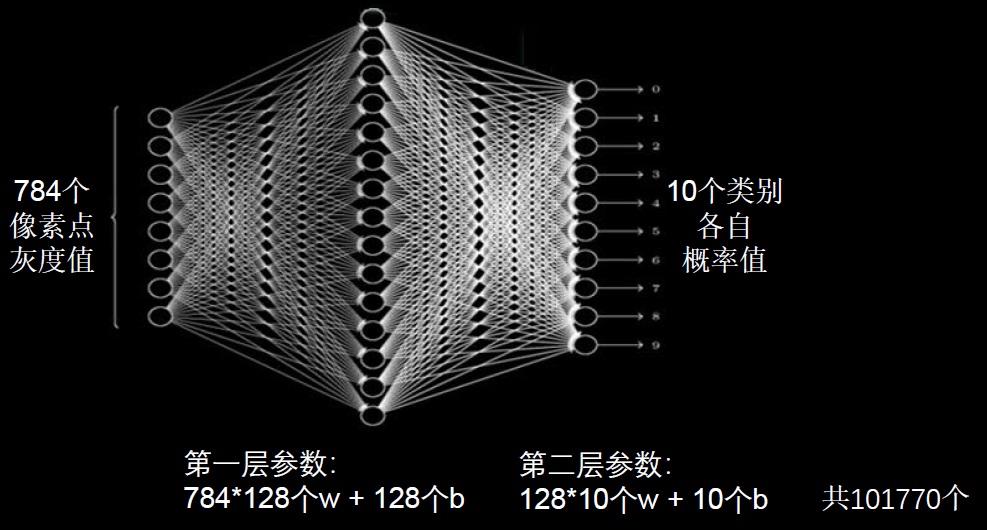

当然，实际情况更复杂，因为784个像素的图像已经是非常小非常模糊的图像了，更何况彩色图像还有RGB三个通道。

这就意味着，按照全连接神经网络的思路来处理视觉（图像）信息，要达到我们想要的效果需要非常大量的训练以及非常长的训练时间。

然而在自然界中，视觉发达的生物对于视觉信息的处理是非常迅速而且精准的，不需要看到什么东西了，得要琢磨一会再反应（比如**Jump scare**），那么是不是网络模型有问题呢？

神经网络是模拟自然界中动物的中枢神经系统构建的，但是了解过基本的生物学知识的话就应该知道，中枢神经系统并不是神经系统的全部。

在视觉系统中，就是先通过视觉感受器官，将图像通过视觉神经处理后再传递给中枢神经系统中的视觉部分来实现视觉的。

同样的，利用神经网络处理视觉与图像信息也可以仿照自然界中生物的视觉，先对图像进行特征提取，再将提取到的特征输入全连接网络。

对于一个成像系统（不考虑后面的信息处理部分的话），与其他线性系统类似，卷积运算是非常基本的一个部分，也可以被认为是一种有效提取图像特征的方法。

基于这样的想法，我们就有了下面的卷积神经网络（**Convolutional Neural Network, CNN**）。

### 卷积神经网络（Convolutional Neural Network, CNN）

所谓“卷积神经网络”，指代一类特殊的神经网络结构，这一类神经网络在至少一个层中使用卷积运算代替一般的矩阵乘法以进行参数的传递。

卷积运算和矩阵乘法一样，都是线性运算，但是区别在于：

矩阵乘法是将前一层所有节点的输出加权求和之后全部传递给后一层的节点作为输入（所以采用这种方式的神经网络被称为全连接神经网络）；

而卷积运算只是将前一层的一部分数据，通过卷积运算处理后传递给下一层的对应节点（前一层中只有一部分的数据被整合之后输入到了下一层）。

在卷积神经网络中，一般会用一个正方形的卷积核（也就是下图中的那个$3\times3$的小矩阵），按指定步长，在输入特征图上滑动，遍历输入特征图中的每个像素点。

每一个步长，卷积核会与输入特征图出现重合区域，重合区域对应元素相乘、求和再加上偏置项得到输出特征的一个像素点。

二维卷积的计算过程如下图所示：

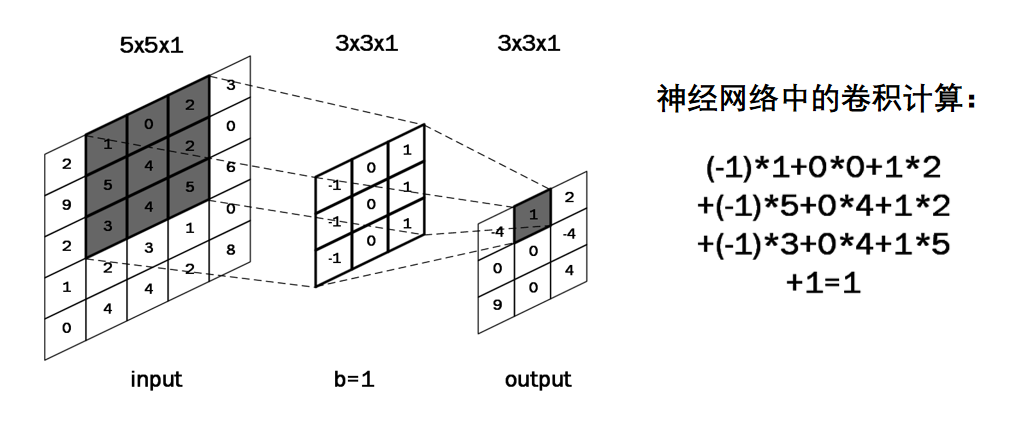

通过卷积运算，卷积神经网络很好的模拟了视觉系统的工作过程。

在视觉系统中，每个感光神经元只接收并处理一部分的视觉信号，然后再向后传递到中枢神经系统，交给视觉皮层分析。

以昆虫的复眼为例，复眼由很多个单眼组成，每个单眼链接一个视神经细胞，把光信号转换为神经信号，之后神经信号再传导至昆虫的脑，最终形成视觉。

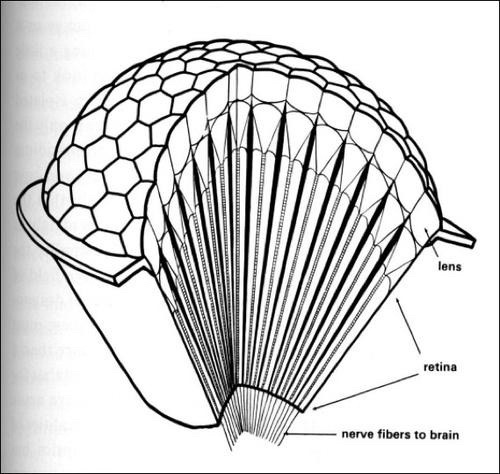

此外，如果各位同学了解CCD相机（Charge-coupled Device）的话，也会发现这个过程和CCD相机也非常接近，在CCD相机中，的每个阵元接收到的都是很小的一部分图像信息，通过很多阵元拼凑起整幅图像来。

#### CNN基本概念介绍

卷积神经网络是在全连接神经网络的基础上发展而来的。

它们的结构很类似，也都是由最基本的人工神经元组成“层”，再通过层层堆叠，相互之间传递数据来组成神经网络。

人工神经元也依然是通过非线性的激活函数对输入信息进行处理再转化为输出。

同样的，卷积神经网络也需要通过训练集来不断地修正网络中的系数，来使它达到我们想要的功能。

区别在于，在卷积神经网络中（准确地说是在卷积神经网络的卷积层中），数据的传递是通过卷积运算（而不是矩阵乘法）完成的。

通过在一般的全连接神经网络之前多次添加卷积层（Convolutional）、激活函数层（Activation）与池化层（Pooling），

之后通过平整化层（Flatten）接入到一个规模比较小的全连接神经网络，来实现对图像信息的处理，和视觉系统的工作流程很相似。

先通过视觉系统把视觉信息整合（卷积层，激活函数层，池化层），然后再传递给中枢神经系统（全连接层）进行处理分析，最终形成视觉。

卷积神经网络的架构一般是这样的

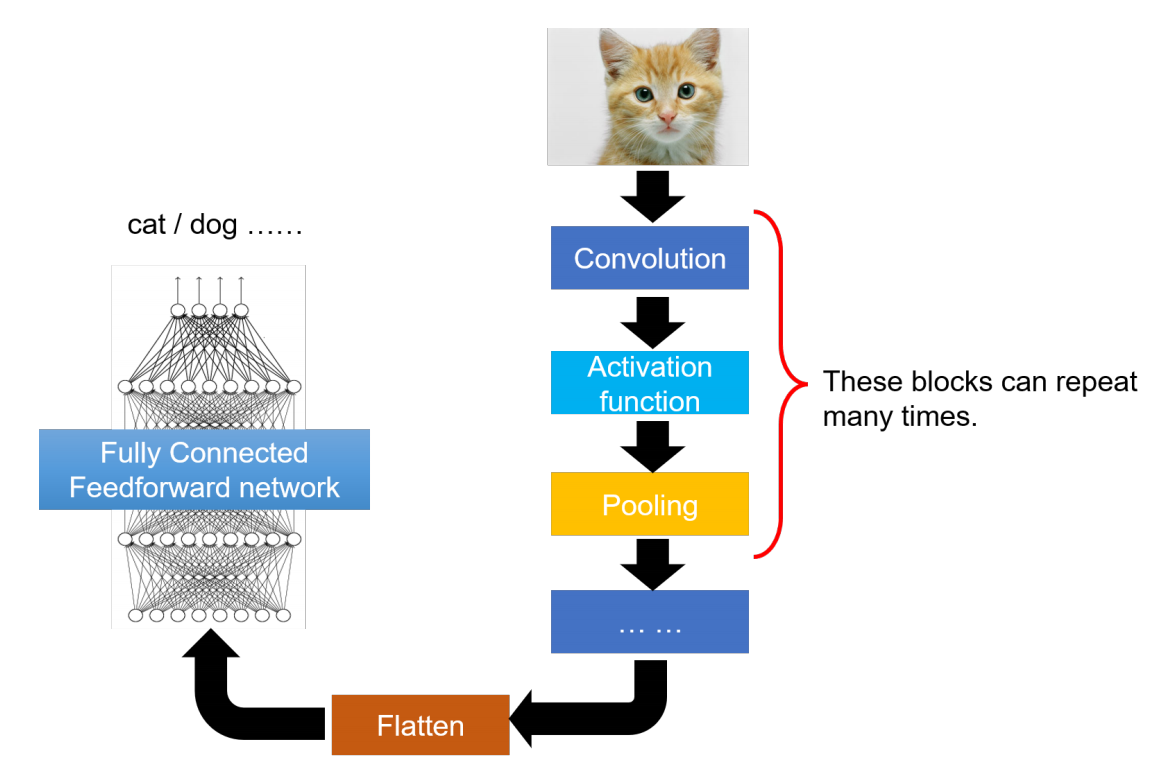

那么我们接下来就看看卷积神经网络中每一部分的功能。

（1）卷积层

我们先回顾一下卷积，最先接触到卷积这个概念应该是在《信号与系统》这门课程中。

当我们需要描述一个线性时不变系统的时候，

我们需要对这个系统$F(t)$输入一个冲激信号$\delta(t)$，以得到这个系统的冲激响应$h(t)$。

$$
\delta(t) \rightarrow F(t) \rightarrow h(t)
$$

有了冲激响应$h(t)$之后，根据冲激信号$\delta(t)$的特性，使得任何信号$f(t)$都能分解为一系列冲激信号的线性叠加（卷积）。

$$
f(t) = \int_{-\infty}^{t} f(\tau)\delta(t-\tau)\, d\tau
$$

再借助线性时不变系统的特性，我们就能得出任何给定信号经过这个系统的输出。

$$
F(t) = \int_{-\infty}^{t} f(\tau)h(t-\tau)\, d\tau
$$

卷积积分图解：

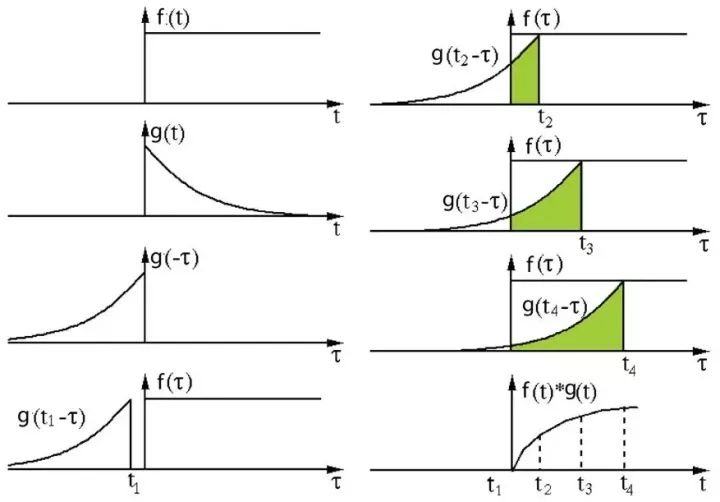

同样的操作不仅适用于一维的时间信号，对应空间上的二维分布（也就是图像，比如$I(x,y)$ 或者 $I(m,n)$）也一样适用，用于描述成像系统对一幅真实影像的成像过程。

$$
O(x,y) = \int_{-\infty}^{+\infty}\int_{-\infty}^{+\infty} I(x_1,y_1)h(x-x_1,y-y_1)\, dxdy
$$

这里的冲激响应函数$h(x,y)$相当于成像系统对于一个点像（point）的响应情况，在不同领域有不同叫法，比如在成像技术领域一般叫点扩展函数（point spread function）。

但是在卷积神经网络里面，我们一般称呼$h(x,y)$为卷积核（kernel）。

如果各位同学接触过成像系统（任何类型的成像系统，比如显微镜，CT，MRI这些）都应该知道，无论多么精细的成像系统都不可能无限制的还原一个物体的所有细节，而总是存在一个极限，也就是分辨率。

他们测量系统分辨率的过程非常类似于求系统的冲激响应$h(x,y)$，比如做超分辨成像的团队就经常用只有几纳米尺度的微球作为成像目标，模拟冲激信号作为输入，然后得到冲激响应函数。

或者有的团队经常测量分辨率板或者刀片的边缘，再通过做差分来得到冲激响应$h(x,y)$，就是利用了冲激响应$h(x,y)$和阶跃响应之间的关系。

当这个成像系统的冲激响应$h(x,y)$越接近冲激信号$\delta(t)$，这个成像系统得到的图像就会越来越接近真实的图像，反之就会越来越模糊。

比如超分辨成像中常用的去卷积（deconvolution）就是为了排除冲激响应$h(x,y)$的影响。

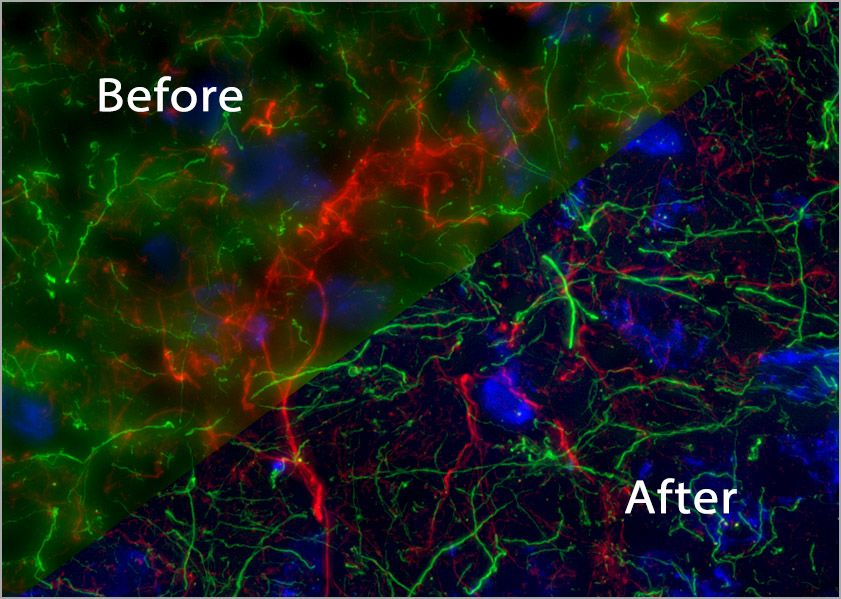

这也就是用卷积来描述成像系统工作过程的原因，当然我们在这里不会过多涉及，但是卷积的计算各位同学需要知道。

————————————————————————————————————————————————————————————————

通过二维卷积，我们可以描述一个成像系统的工作过程，也可以实现图像特征的提取以及图像的降维。

降维自不必说，大家都好理解，但是为什么卷积能够提取图像的特征呢？

关于卷积为什么能够用来提取图像特征，我这里还没有找到一个特别有说服力的说法，所以就提供一种我自己的理解，给大家参考。

卷积对于图像的作用有些类似于“打码”（当然这个“打码”不是乱打的，是遵循一定规律的）。

从我们人眼直接观察的角度去理解的话，如果一幅图像经过这样一次“打码”之后，就会变得模糊。

但是如果一幅模糊图像，我们还是能看出这幅图的大致内容，那么就说明经过“打码”保留下来的信息是这幅图像的“主要信息”。

但是同样的，因为图像经过“打码”，变得模糊了，所以一些细节信息肯定就看不清了。

也就是说，卷积这样一个操作忽略了一幅图像中的细节信息，而保留着主要信息。

当然，不同的卷积核与输入图像做卷积得到的效果也不一样，如下图所示。

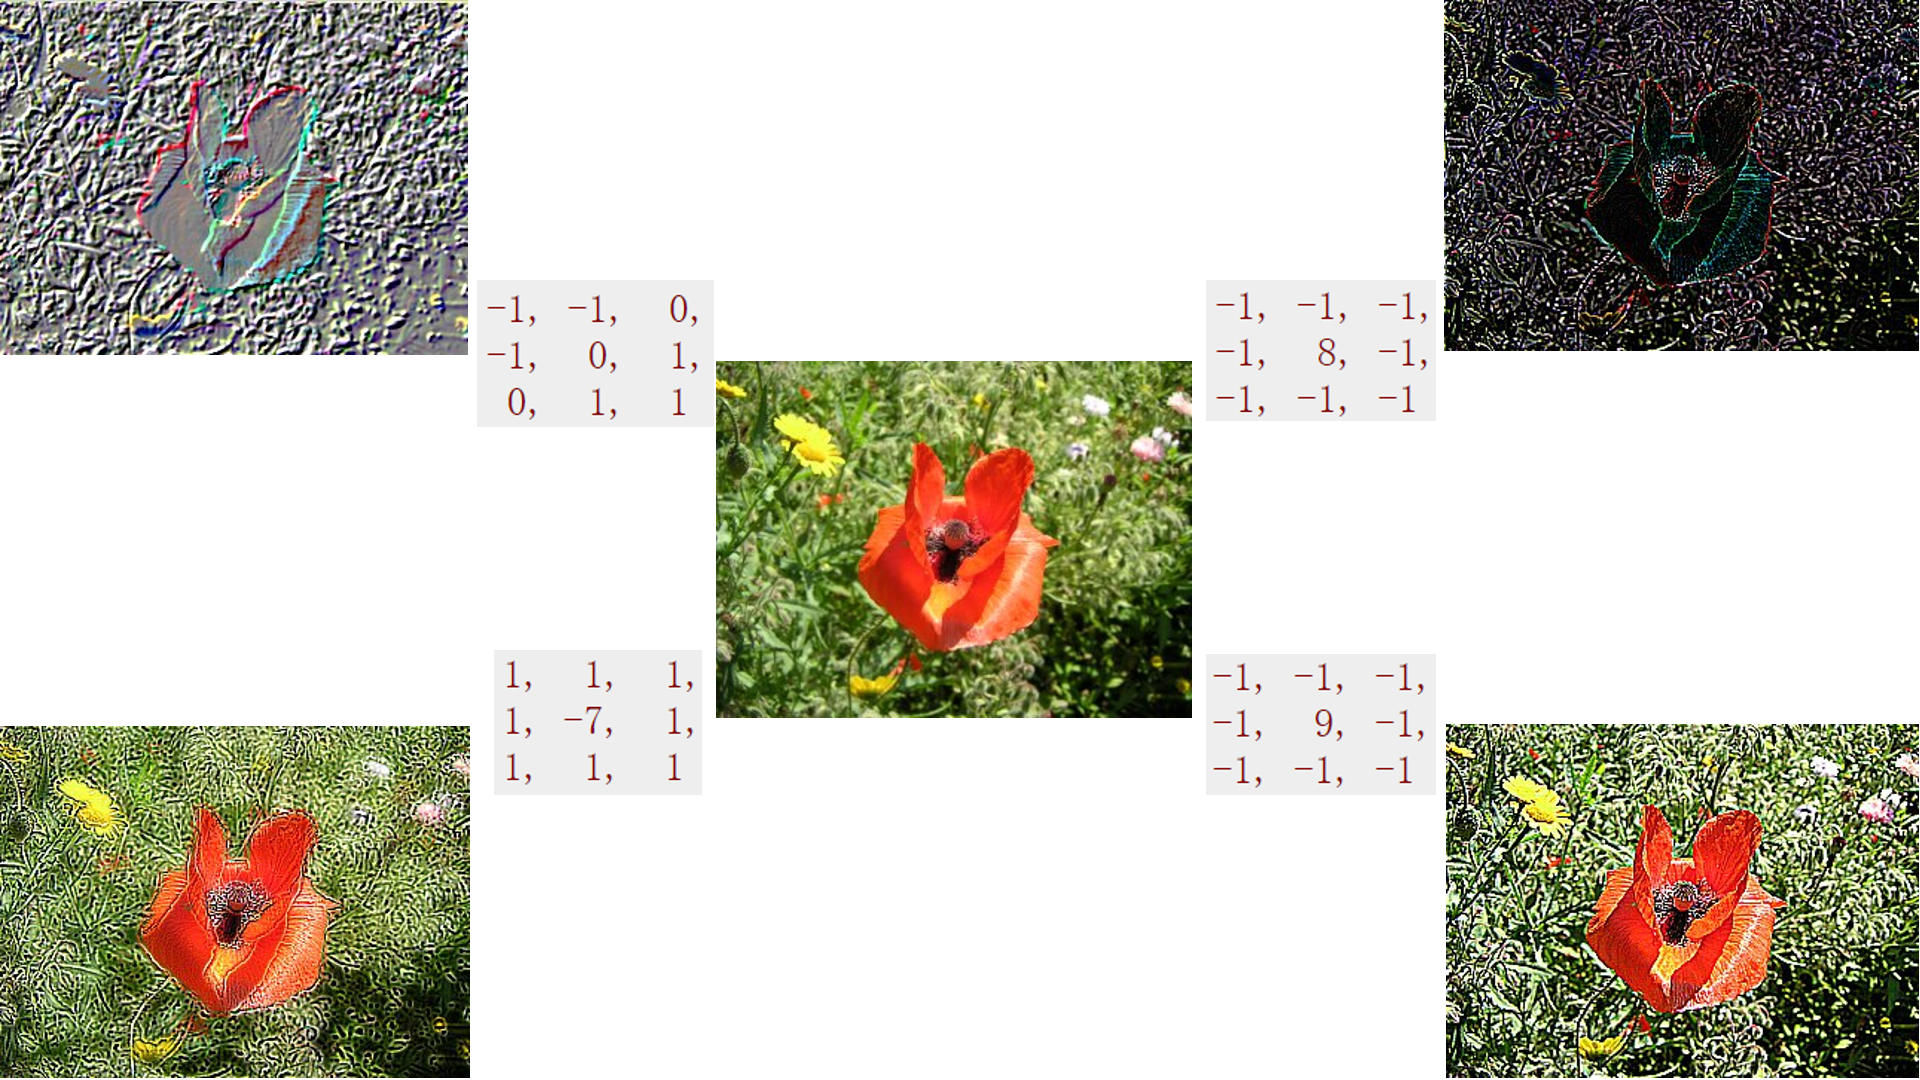

所以卷积核的参数也是需要训练的，而且由于不同的卷积核得到的结果（也就是特征）不同，所以在卷积层中一般都不会只配置一个卷积核（kernel 或者说 filter）进行卷积运算，因此会得到很多个卷积结果。

当然，这里还有一个问题，既然不同的卷积核得到的结果不一样，那么是不是和全连接神经网络中的权重系数矩阵$\mathbf{W}$一样，每进行一次卷积我们都要换一个不同的卷积核？

当然，从实际意义上来考虑，这样做没什么问题，毕竟每个视神经的性能都不可能完全一致，人眼视网膜上甚至还会有盲点（blind point）

但是如果真的这样操作了，就会导致需要训练的参数非常多，这就又回到了全连接神经网络遇到的问题，所以在实际情况中我们不能这样操作。

在实际操作中，卷积层采用参数共享（Sharing）机制控制参数个数，也就是

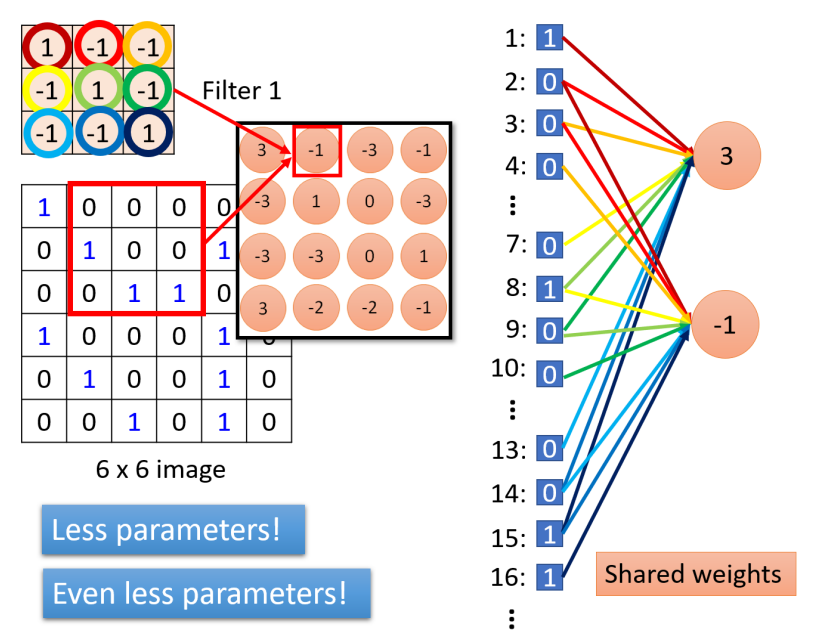

简单来说我们不用每卷积一次就更换一次卷积核，而实用一个卷积核卷完一整张图之后，再换下一个，提取下一类特征（具体用多少个卷积核可以自由设置）

因为权值共享后意味着每一个卷积核只能提取到一种特征，为了增加卷积神经网络处理信息的能力，当然需要多个核。

之所以能够这样操作是基于一个合理的假设，那就是如果一个特征在某个空间位置$(x_1,y_1)$上的计算是有用的，那么在另一个位置$(x_2,y_2)$上的计算也是有用的。

为了方便理解，我在这里打一个不太恰当的比方，我们用左眼和右眼看东西的时候确实会有不一样，大家可以交替的遮挡左眼和右眼来体验一下，但是一般情况下，左右眼看到的东西不会有很大差别，所以为了便于分析，我们就假设左右眼的成像性能是完全相同的。

同样的，对于由多个视觉神经元组成的视觉系统，虽然不同的神经元之间一定会有差异，但是一般情况下这个差以不会特别离谱，所以我们不妨就假设每个神经元的冲激响应$h(x,y)$都一样。

这也就是卷积神经网络中的参数共享（Sharing）。

（2）激活函数层

激活函数用来模拟自然界中的神经元细胞对神经信号的响应，由于神经元细胞全由全无率的特征，激活函数一般都是非线性函数。

常用的激活函数我们之前介绍过，包括：

Rectified Linear Unit(ReLU)函数：

$$
h(a) = max\left\{{0,a}\right\}
$$

Leaky ReLU函数:

$$    
h(a) =
    \left\{
        {\begin{array}{cc}
             \alpha a, & for\space a<=0 \\
                  a, & for\space a>0 \\
         \end{array} }
    \right.
$$

TanH(双曲正切)函数：

$$
h(a) = \frac{e^{a} - e^{-a}}{e^{a} + e^{-a}}
$$

等等，这些函数从图像上也都很容易的就能看出一定的全有全无率特征，这里我们就不罗嗦了。

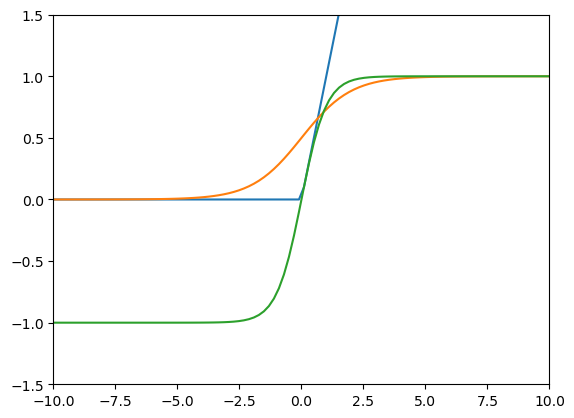

（3）池化层

池化（Pooling）的本质其实就是降采样。

所谓池化，是通过将输入的图像划分为若干个矩形区域，对每个子区域输出最大值的方式实现降采样。

池化有很多种方式，其中“最大池化（Max pooling）”是最为常见的，所以我们这里只介绍比较基础的最大值池化（MaxPooling）。

除此之外也有“平均池化”以及“L2-范数池化”等。

池化之所以有效，有一种从直觉上的解释，大概是这样的，当发现一个特征之后，它的精确位置远不及它和其他特征的相对位置的关系重要。

池化层会不断地减小数据的空间大小，因此参数的数量和计算量也会下降。

作为代价，经过池化层处理的图像损失了一部分信息，这是与计算性能之间的妥协。

池化的示意图如下：

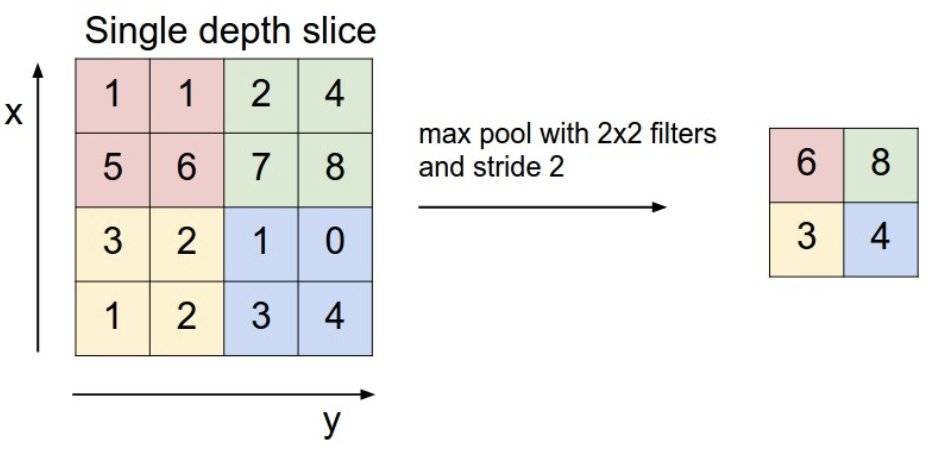

一般的池化都是采用$2\times2$的方格，因此池化层一般不怎么需要再设置参数了。

P.S. 池化的这个翻译有点望文生义，大家可以理解为汇聚（很多水管往一个水池里灌水的感觉），可能会好理解一些。

（4）平整化层

平整化层是卷积层和全连接神经网络之间的“接口”层，由于全连接神经网络一般以向量作为输入，因此平整化的作用就是将卷积层输出的二维矩阵转换为一维向量。

将二维矩阵转换为一维向量的常规操作是按照行或者列将一个矩阵“撕成条”，然后再“串”起来。

平整化层的示意图。

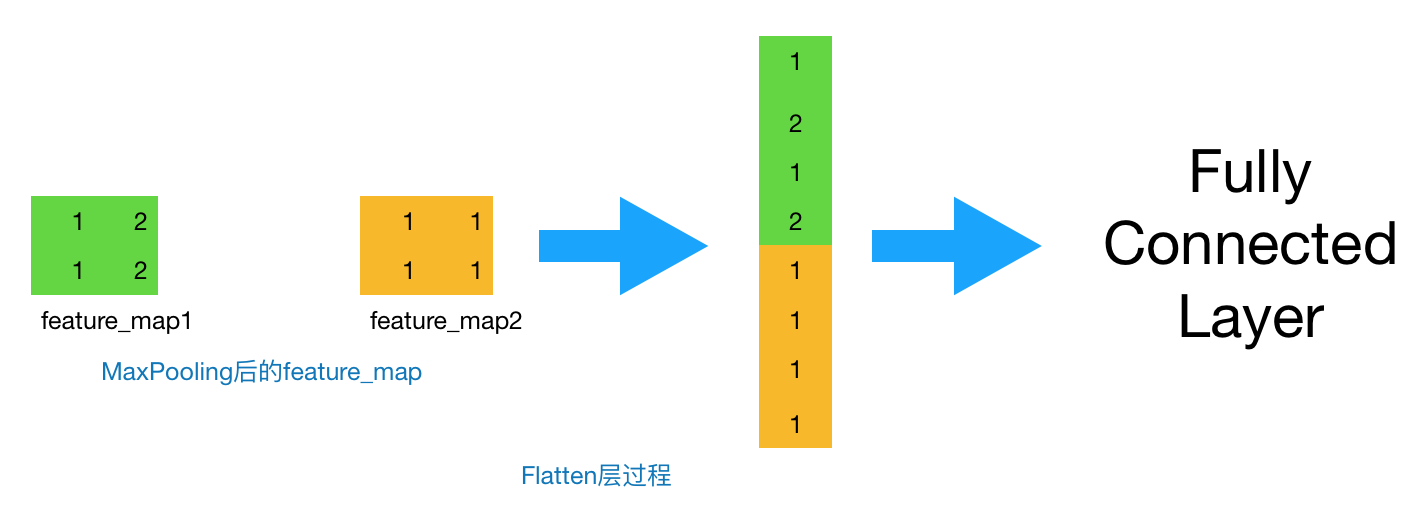

但是其实也可以胡乱的随便从二维矩阵里面挑选像素排成一列（但是这个转换方法确定下来之后就不能再变了），这并不影响后面的结果，因为如果输入数据是按照同样的方式完成平整化的，后面的神经网络也会在训练过程中跟着变化，所以最终结果不受影响。

（5）归一化层

有些神经网络中除了上面的这些层之外还存在归一化操作（Normalization）

这是因为我们采用某些激活函数，比如sigmoid函数或者tanH函数时，由于这些函数的值域是有限的$ [0, 1] 或者 [1, 1] $

这个时候如果要求他们输出值域范围以外的数值容易出现问题，所以需要插入归一化层来

相比之下，ReLU函数在这方面的问题会少一些，所以神经网络中，ReLU函数用的比较多。

这里提及一下。

### 拓展——卷积运算为什么要翻转

我们在前面的课程中讲解了全连接神经网络，而卷积神经网络与全连接神经网络的区别就在于它采用了卷积运算代替矩阵乘法在层与层之间传递数据。

关于卷积为什么要翻转。

单纯的从数学上去解释其实比较困难，因为数学上要定义一个运算或者概念，是可以任意进行的，只要逻辑自洽，不会引出矛盾就行了。

卷积运算为什么要翻转，是因为这样做符合实际情况，也就是能够解决实际问题（这样做有用）。

下面的图应该能够帮助大家理解

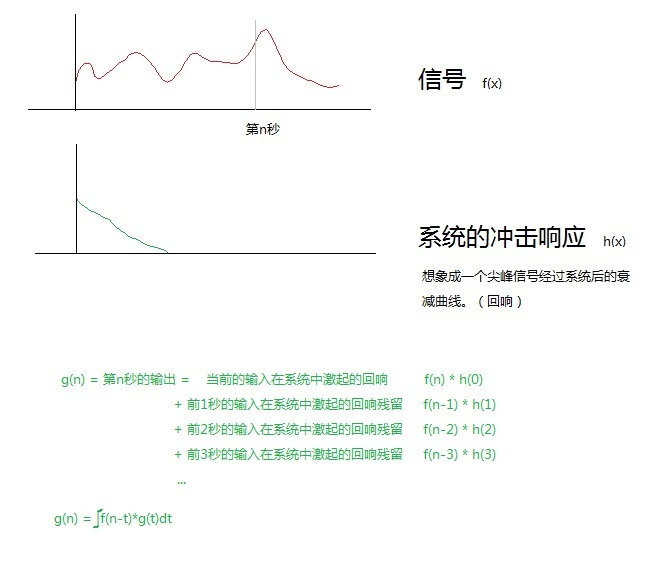

与全连接神经网络中层与层的权重参数一样，卷积核（kernel）也是需要不断修正的，要修正就要知道偏导数，也就是卷积如何求导。

卷积求导公式如下：

$$
[f(t)*g(t)]' = f(t)*g'(t) = f'(t)*g(t)
$$

当然，在实际应用中我们不需要自己操作这些过程，大家理解这个意思就好了，不然就太麻烦了。

卷积相关性质的证明可以参考：https://zhuanlan.zhihu.com/p/150737244

### 循环神经网络（Recurrent neural network, RNN）

相比于卷积神经网络，在我所了解的领域，循环神经网络的应用案例相对比较少，在自然语言处理（Natural Language Processing, NLP）方面应用比较广泛一些。

这里我们简单涉猎一下。

循环神经网络和前面讲过的卷积神经网络一样，都是从全连接神经网络发展而来的。

卷积神经网络以卷积运算为基础，通过卷积层，激活函数层和池化层不断地对图像进行特征提取和降维，是模拟视觉系统搭建的网络架构。

视觉系统对空间维度信息比较敏感，卷积神经网络也通常对图像这样的空间分布函数（$I(m,n)$）进行处理，通过卷积运算，实现对空间特征的提取和分析。

那么根据时空的对位性，肯定也有用来处理时间维度信息的神经网络，这就是我们这里要说的循环神经网络。

循环神经网络是对记忆或者说经验系统进行的模拟，比如我们根据以往经验对当下的某件事情作出判断的时候，这个判断的结果不仅与此时此刻我们获取的信息相关，也和我们以往的经验有关系。

循环神经网络借助循环核（cell）来进行信息的处理与分析，之后，与卷积神经网络一样，循环神经网络最终还是要将循环层处理过后的数据传递给全连接神经网络，再通过全连接神经网络拟合，计算以及处理来输出最终结果。

#### RNN基本概念介绍

循环神经网络也是基于全连接神经网络衍生出来的一类具有特殊性质的神经网络结构。

和卷积神经网络不同，循环神经网络通过一个延迟层实现了循环，从而使得神经网络的输出与当前时刻的输入以及神经网络自身前一个（或者几个）时刻的状态发生了关联。

循环神经网络的基本单元是循环核，循环核具有记忆力，通过不同时刻的参数共享，实现了对时间序列的信息提取。

每个循环核有多个记忆体，对应下图中的多个小圆柱。如下图所示：

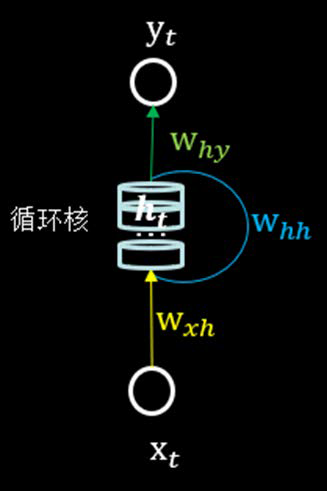

记忆体内存储着每个时刻的状态信息$h_t$ 

$$
h_t = tanh(x_tw_{xh} + h_{t-1}w_{hh} + bh)
$$

其中$w_{xh}$，$w_{hh}$为权重矩阵，$bh$为偏置，$x_t$为当前时刻的输入特征，$h_{t-1}$为记忆体上一时刻存储的状态信息，$tanh$为激活函数

当前时刻循环核的输出特征

$$
y_t = softmax(h_tw_{hy} + by) 
$$

其中$w_{hy}$为权重矩阵，$by$为偏置，$softmax$为激活函数，其实就相当于一层全连接层。

我们可以设定记忆体的个数从而改变记忆容量，当记忆体个数被指定，输入$x_t$与输出$y_t$的维度被指定，周围这些待训练参数的维度也就被限定了。

在前向传播时，记忆体内存储的状态信息h𝑡𝑡在每个时刻都被刷新，而三个参数矩阵$w_{xh}$，$w_{hh}$，$w_{hy}$和两个偏置项$bh$，$by$自始至终都是固定不变的。在反向传播时，三个参数矩阵和两个偏置项由梯度下降法更新。

将循环核按时间步展开，就是把循环核按照时间轴方向展开，可以得到如下图的形式。

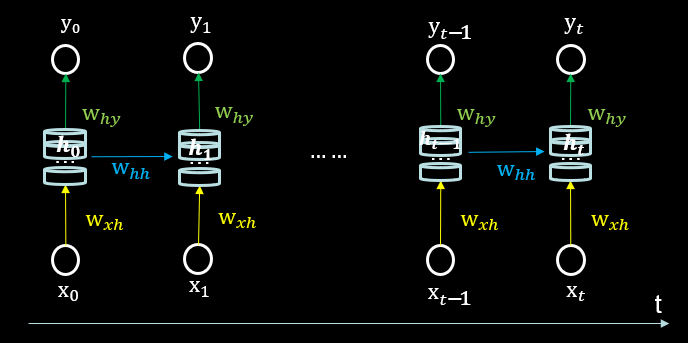

每个时刻记忆体状态信息$h_t$被刷新，记忆体周围的参数矩阵和两个偏置项是固定不变的，我们训练优化的就是这些参数矩阵。

训练完成后，使用效果最好的参数矩阵执行前向传播，然后输出预测结果。

这个过程这和我们人类的预测是一致的：我们脑中的记忆体每个时刻都根据当前的输入而更新；当前的预测推理是根据我们以往的知识积累用固化下来的“参数矩阵”进行的推理判断。

可以看出，循环神经网络就是借助循环核实现时间特征提取后把提取到的信息送入全连接网络，从而实现连续数据的预测。

在循环神经网络中，每个循环核构成一层循环计算层，循环计算层的层数是向输出方向增长的。

如下图所示，左图的网络有一个循环核，构成了一层循环计算层；中图的网络有两个循环核，构成了两层循环计算层；右图的网络有三个循环核，构成了三层循环计算层。其中，三个网络中每个循环核中记忆体的个数可以根据我们的需求任意指定。

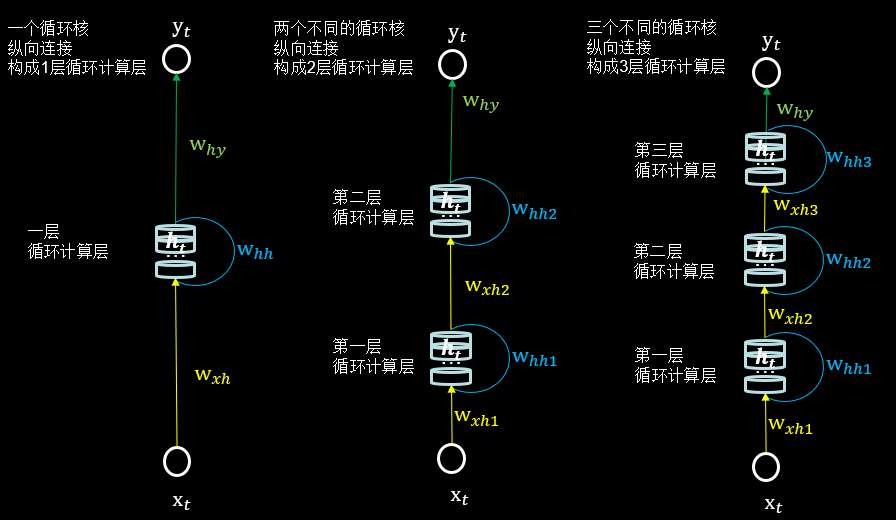

循环神经网络也属于神经网络的一种，因此也需要同样的，应用后向传播以及梯度下降法来不断的更新参数以最小化误差函数。

这个过程中也和全连接神经网络一样存在大量的数学推导以计算误差函数关于每个权重参数的偏导数。

推导过程详见：https://blog.csdn.net/weixin_46204734/article/details/121531351

关于循环神经网络怎么和全连接网络相互连接，可以参照这张图片进行理解。

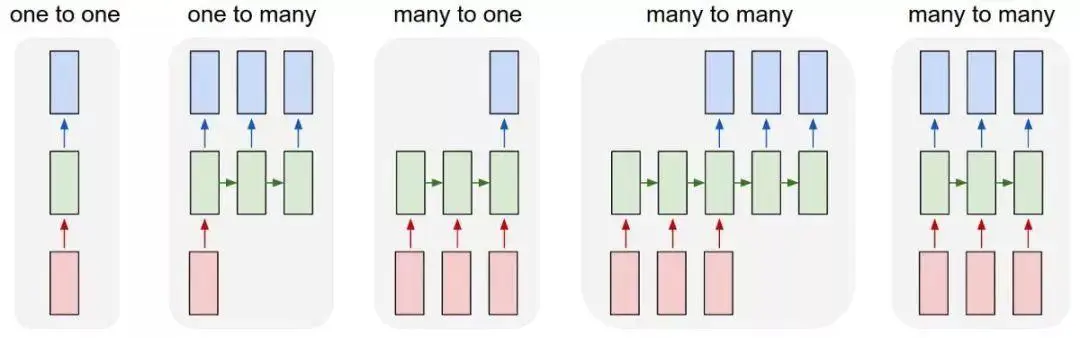

可以有多种形式

P.S. 循环神经网络有很多子类型，其中比较重要的一种是长短期记忆网络（Long short-term memory，LSTM），是RNN的一种。

LSTM比基本的循环神经网络高级一些，一般情况下使用的循环神经网络都是使用LSTM，而最基础版的RNN现在很少有人使用。

以上就是CNN和RNN的基本概念了，下面我们看一下怎么在Python环境中实现CNN和RNN。

————————————————————————————————————————————————————————————————

# 2-CNN & RNN的Python实现

关于CNN 和 RNN的Python语言实现，我们在前面全连接的范例中讲解了

但是CNN 和 RNN的规模往往都比较大，所以再用原始代码来实现确实比较困难，而且出了错也不容易排除。

所以我们这里只简单介绍几种典型的CNN 和 RNN神经网络架构，一起拆解一下这些语句的含义，帮助大家理解。

下面是一个用卷积神经网络进行手写字体识别的案例，采用PyTorch工具包实现。

这个卷积神经网络由两个卷积层组成，之后是全连接神经网络。

关于PyTorch工具包的安装我们上节课有提及。

首先是导入库

In [2]:
# 导入库
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

然后是定义超参数

In [3]:
# 定义超参数，其中DOWNLOAD_MNIST=True表示会下载这个数据集，如果已经安装了就不用下载了。
EPOCH = 1
BATCH_SIZE = 50
LR = 0.001
DOWNLOAD_MNIST = True

然后产生数据集，这里是下载MNIST数据集中的手写字体

torch.Size([60000, 28, 28])
torch.Size([60000])


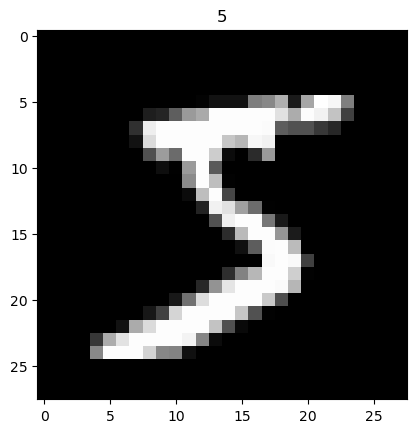

In [9]:
train_data = torchvision.datasets.MNIST(
    root='./mnist',
    train=True,
    # 将下载的文件转换成pytorch认识的tensor类型，且将图片的数值大小从（0-255）归一化到（0-1）
    transform=torchvision.transforms.ToTensor(),  
    download=DOWNLOAD_MNIST
)

train_loader = Data.DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

test_data = torchvision.datasets.MNIST(
    root='./mnist',
    train=False,
)
with torch.no_grad():
    # 只取前两千个数据，然后将其归一化。
    test_x = Variable(torch.unsqueeze(test_data.data, dim=1)).type(torch.FloatTensor)[:2000] / 255  
    test_y = test_data.targets[:2000]
    

# 画一个图片显示出来
print(train_data.data.size())
print(train_data.targets.size())
plt.imshow(train_data.data[0].numpy(),cmap='gray')
plt.title('%i'%train_data.targets[0])
plt.show()

然后利用class关键字定义卷积神经网络的模型

包括：卷积层1，卷积层2，以及全连接层。

In [5]:
# 开始建立CNN网络
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        # 卷积层1
        self.conv1 = nn.Sequential(
            # 2d代表二维卷积  我们的输入是--> (1,28,28)输出是--> (16,28,28)
            nn.Conv2d(  
                # 设置传入的图片的层数，灰色为1层，RGB为三层
                in_channels=1, 
                # 设置输出的图片的层数，也就是我们准备用几个卷积核去提取特征
                out_channels=16,  
                # 卷积核的尺寸为5*5
                kernel_size=5,  
                # 卷积核每次平移的步长
                stride=1,  
                # 边框补全，其计算公式=（kernel_size-1）/2=(5-1)/2=2
                padding=2,  
            ),  
            # 激活层函数层
            nn.ReLU(),  
            # 2*2池化，最终输出为--> (16,14,14)
            nn.MaxPool2d(kernel_size=2),            
        )
        # 卷积层2
        self.conv2 = nn.Sequential(
            # 这一层的输入为上一层的输出--> (16,14,14) --> (32,14,14)
            nn.Conv2d(  
                # 所以是16层
                in_channels=16, 
                # 在这里我们需要将其输出为32层
                out_channels=32,
                # 代表扫描的区域点为5*5
                kernel_size=5,  
                # 就是每隔多少步跳一下
                stride=1,  
                # 边框补全，其计算公式=（kernel_size-1）/2=(5-1)/2=
                padding=2,  
            ),  
            # 激活层函数层
            nn.ReLU(),
            # 设定这里的扫描区域为2*2，且取出该2*2中的最大值 --> (32,7,7)，这里是三维数据
            nn.MaxPool2d(kernel_size=2),  
        )

        self.out = nn.Linear(32 * 7 * 7, 10)  # 注意一下这里的数据是二维的数据
    
    # 前向传递，后向传递由Pytorch自行计算，就不用我们操心了。
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)  # （batch,32,7,7）
        # 然后接下来进行一下扩展展平的操作，将三维数据转为二维的数据
        x = x.view(x.size(0), -1)  # (batch ,32 * 7 * 7)
        output = self.out(x)
        return output


之后是创建神经网络，指定优化方法，指定损失函数

In [6]:
# 创建卷积神经网络（前面是用class关键字定义卷积神经网络）
cnn = CNN()
# print(cnn)

# 添加优化方法
optimizer = torch.optim.Adam(cnn.parameters(), lr=LR)
# 指定损失函数使用交叉信息熵
loss_fn = nn.CrossEntropyLoss()

开始训练

In [7]:
# 开始训练
step = 0
for epoch in range(EPOCH):
    # 加载训练数据
    for step, data in enumerate(train_loader):
        x, y = data
        # 分别得到训练数据的x和y的取值
        b_x = Variable(x)
        b_y = Variable(y)
        
        # 调用模型预测
        output = cnn(b_x) 
        # 计算损失值
        loss = loss_fn(output, b_y)  
        # 每一次循环之前，将梯度清零
        optimizer.zero_grad()  
        # 反向传播
        loss.backward()  
        # 梯度下降
        optimizer.step()  

        # 每执行50次，输出一下当前epoch、loss、accuracy
        if (step % 50 == 0):
            # 计算一下模型预测正确率
            test_output = cnn(test_x)
            y_pred = torch.max(test_output, 1)[1].data.squeeze()
            accuracy = sum(y_pred == test_y).item() / test_y.size(0)

            print('now epoch :  ', epoch, '   |  loss : %.4f ' % loss.item(), '     |   accuracy :   ', accuracy)


now epoch :   0    |  loss : 2.3207       |   accuracy :    0.124
now epoch :   0    |  loss : 0.6302       |   accuracy :    0.817
now epoch :   0    |  loss : 0.4086       |   accuracy :    0.882
now epoch :   0    |  loss : 0.3046       |   accuracy :    0.8955
now epoch :   0    |  loss : 0.3040       |   accuracy :    0.936
now epoch :   0    |  loss : 0.2163       |   accuracy :    0.943
now epoch :   0    |  loss : 0.2491       |   accuracy :    0.9455
now epoch :   0    |  loss : 0.1141       |   accuracy :    0.9605
now epoch :   0    |  loss : 0.1836       |   accuracy :    0.9615
now epoch :   0    |  loss : 0.1584       |   accuracy :    0.9665
now epoch :   0    |  loss : 0.0410       |   accuracy :    0.972
now epoch :   0    |  loss : 0.0785       |   accuracy :    0.957
now epoch :   0    |  loss : 0.0654       |   accuracy :    0.971
now epoch :   0    |  loss : 0.1093       |   accuracy :    0.9745
now epoch :   0    |  loss : 0.0154       |   accuracy :    0.973
now 

测试结果。

In [8]:
# 打印十个测试集的结果
test_output = cnn(test_x[:10])
y_pred = torch.max(test_output, 1)[1].data.squeeze()  # 选取最大可能的数值所在的位置
print(y_pred.tolist(), 'predecton Result')
print(test_y[:10].tolist(), 'Real Result')

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9] predecton Result
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9] Real Result


————————————————————————————————————————————————————————————————

上面就是一个简单的CNN的案例，我们下面再看看RNN的。

这里有一个应用循环神经网络预测正弦函数的一个的案例。

首先还是导入库

In [10]:
#导入库
import torch
import torch.nn as nn
import numpy as np
import torch.optim as optim
from matplotlib import pyplot as plt

然后定义超参数

In [11]:
# 超参数
num_time_steps = 50
input_size = 1
hidden_size = 16
output_size = 1
num_layers = 1
lr=0.01

然后用class关键字定义网络结构

In [12]:
# 定义网络结构
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.rnn = nn.RNN(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True  # [batch, seq, feature]
        )

        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden_prev):  # x, h0
        # x: [batch_size, seq_len, input_size]
        # hidden_prev: [num_layers, batch_size, h_dim]  h_dim就是hidden_size
        out, hidden_prev = self.rnn(x, hidden_prev)
        # out: [batch_size, seq_len, h_dim]
        # hidden_prev: [num_layers, batch_size, h_dim]

        # [batch, seq, hidden_size] => [batch * seq, hidden_size]
        out = out.view(-1, hidden_size)

        # [batch * seq_len, hidden_size] => [batch * seq_len, output_size]
        out = self.linear(out)

        # [batch * seq_len, output_size] => [1, batch * seq_len, output_size]  这里batch=1
        out = out.unsqueeze(dim=0)

        return out, hidden_prev

声明网络，loss，优化器

In [13]:
# 创建网络。误差函数，以及优化器
model = Net()
loss_function = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr)

hidden_prev = torch.zeros(num_layers, 1, hidden_size)

开始训练网络

In [14]:
# 训练网络
for iter in range(6000):
    start = np.random.randint(3, size=1)[0]  # 开始的时刻，会在0-3之随机初始化。
    time_steps = np.linspace(start, start + 10, num_time_steps)  # 训练的数据：从start时刻到start+10时刻
    data = np.sin(time_steps)
    data = data.reshape(num_time_steps, 1)

    # 只往后预测一个点
    x = torch.tensor(data[:-1]).float().view(1, num_time_steps - 1, 1)  # 去掉最后一个元素，作为输入
    # x.shape:  torch.Size([1, 49, 1]) [batch_size, seq_len, input_size]

    y = torch.tensor(data[1:]).float().view(1, num_time_steps - 1, 1)  # 去掉第一个元素，作为label
    # y.shape:  torch.Size([1, 49, 1])

    # 神经网络前传
    output, hidden_prev = model(x, hidden_prev)

    hidden_prev = hidden_prev.detach()  # 将variable参数从网络中隔离开，不参与参数更新。

    loss = loss_function(output, y)
    model.zero_grad()
    loss.backward()
    optimizer.step()

    if iter % 100 == 0:
        print("Iteration: {} loss {}".format(iter, loss.item()))

Iteration: 0 loss 0.4279898703098297
Iteration: 100 loss 0.00905640795826912
Iteration: 200 loss 0.0012282730313017964
Iteration: 300 loss 0.001097574713639915
Iteration: 400 loss 0.0011712269624695182
Iteration: 500 loss 0.0010571046732366085
Iteration: 600 loss 0.0003537510638125241
Iteration: 700 loss 0.002817226108163595
Iteration: 800 loss 0.0003197606420144439
Iteration: 900 loss 0.00040427554631605744
Iteration: 1000 loss 0.0018522661412134767
Iteration: 1100 loss 0.0009389768820255995
Iteration: 1200 loss 0.00031043545459397137
Iteration: 1300 loss 0.0010796297574415803
Iteration: 1400 loss 0.0010980095248669386
Iteration: 1500 loss 0.0007538628415204585
Iteration: 1600 loss 0.0008291875128634274
Iteration: 1700 loss 0.00027504231547936797
Iteration: 1800 loss 0.0006183568038977683
Iteration: 1900 loss 0.00013690743071492761
Iteration: 2000 loss 0.000697503739502281
Iteration: 2100 loss 0.0005199993611313403
Iteration: 2200 loss 0.00038211597711779177
Iteration: 2300 loss 0.000

测试网络

In [15]:
# 测试网络
start = np.random.randint(3, size=1)[0]
time_steps = np.linspace(start, start + 10, num_time_steps)
data = np.sin(time_steps)
data = data.reshape(num_time_steps, 1)
x = torch.tensor(data[:-1]).float().view(1, num_time_steps - 1, 1)
y = torch.tensor(data[1:]).float().view(1, num_time_steps - 1, 1)

predictions = []
input = x[:, 0, :]
for _ in range(x.shape[1]):
  input = input.view(1, 1, 1)
  pred, hidden_prev = model(input, hidden_prev)
  input = pred
  predictions.append(pred.detach().numpy().ravel()[0])

画图

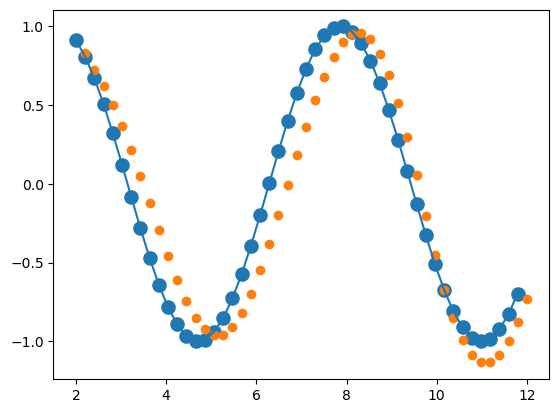

In [16]:
# 画图
x = x.data.numpy().ravel()
y = y.data.numpy()
plt.scatter(time_steps[:-1], x.ravel(), s=90)
plt.plot(time_steps[:-1], x.ravel())

plt.scatter(time_steps[1:], predictions)
plt.show()

最终我们可以得到这样一个循环神经网络。

————————————————————————————————————————————————————————————————

# 3-CNN & RNN的简单练习

我们这里给大家提供一些简单的练习题，各位同学对CNN 和 RNN感兴趣的同学可以先从这些简单的范例入手。

考虑到各位同学这个月压力比较大，我讲的也确实不好，最终的作业要求的也比较突然，这次的练习题就不作强制要求了，各位同学感兴趣的可以在忙完了之后再练习一下这些简单的题目也没关系，能学到东西就好。

题目1：

尝试识别图片中的小猫或者小狗。

作为卷积神经网络的经典案例，对图像进行分类是卷积神经网络最常见的应用，请尝试用卷积神经网络实现对猫跟狗图片的分类与识别，也就是要求神经网络能够判断输入图片上显示的是猫还是狗。

猫狗图片数据集下载：

https://pan.baidu.com/s/1f-MvZl7_J6DF7P9CGBY3SQ

提取码：ruyn

题目2：

尝试识别手写语句。

循环神经网络在自然语言分析方面的典型应用，神经网络需要能够将手写字体识别出来。

数据集下载：http://yann.lecun.com/exdb/mnist/

参考资料：

卷积神经网络：

https://blog.csdn.net/weixin_53065229/article/details/125972360

https://blog.csdn.net/weixin_38468077/article/details/106592690

循环神经网络：

https://blog.csdn.net/weixin_53065229/article/details/125994491